In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import glob
import numpy as np
style.use('ggplot')

Data Massaging! Ignoring student 15 for now. 

This section of code I used interactively to make the datafiles be consistent with the bare minimum being columns including building, time in, time out, and the reason.

In [ ]:
all_files = glob.glob("Data/*.csv")
all_files.sort()
df_from_each_file = [pd.read_csv(f) for f in all_files]


In [ ]:
print(len(df_from_each_file))

In [ ]:
current_file = 26 -1
df = df_from_each_file[current_file]
# df = pd.read_csv("Data/25grad_CS_1.csv",header=None,usecols=[0,1,4,5,6])
# df["Time_In"] = pd.to_datetime(df["Day"]+" " +df["Time-In"])
# df["Time_Out"] = pd.to_datetime(df["Day"]+" " +df["Time-Out"])
# df["Time_Diff"] = (df.Time_Out - df.Time_In).astype("timedelta64[m]")
# df.Reason = df.Reason.str.lower()
print(all_files[current_file])

In [ ]:
df.head(100)

In [ ]:
df.columns = ["Date","Buliding","In","Out","Reason"]

In [ ]:
# df.dropna(inplace=True)
# df = df.drop(df[df.BUILDING=="None"].index)
df.loc[df["Day"] == "Sunday", 'Day'] = "2/3/2019"
df.loc[df["Day"] == "Monday", 'Day'] = "2/4/2019"
df.loc[df["Day"] == "Tuesday","Day"] = "2/5/2019"
df.loc[df["Day"] == "Wednesday","Day"] = "2/6/2019"
df.loc[df["Day"] == "Thursday","Day"] = "2/7/2019"
df.loc[df["Day"] == "Friday", 'Day'] = "2/8/2019"
df.loc[df["Day"] == 'Saturday', 'Day'] = "2/9/2019"

# df.loc[df.Day == "2/3","Day"] = "2/3/2019"
# df.loc[df.Day == "2/4","Day"] = "2/4/2019"
# df.loc[df.Day == "2/5","Day"] = "2/5/2019"
# df.loc[df.Day == "2/6","Day"] = "2/6/2019"
# df.loc[df.Day == "2/7","Day"] = "2/7/2019"
# df.loc[df.Day == "2/8","Day"] = "2/8/2019"
# df.loc[df.Day == "2/9","Day"] = "2/9/2019"


In [ ]:
df.loc[df.Action == "Enter","Time_In"] = df.Date
df.loc[df.Action == "Exit","Time_Out"] = df.Date

In [ ]:
df['Out'] = df['Out'].str.replace('.',':')

In [ ]:
df.head(10)
# df = df.rename(index=str,columns={"Reason for visit":"Reason","Time Entered":"Time_In","Time Left":"Time_Out"})

In [ ]:
df["Time_In"] = pd.to_datetime(df["Date"]+" " +df["In"])
df["Time_Out"] = pd.to_datetime(df["Date"]+" " +df["Out"])
# df["Time_In"] = pd.to_datetime(df.Time_In)
# df["Time_Out"] = pd.to_datetime(df.Time_Out)
df["Time_Diff"] = (df.Time_Out - df.Time_In).astype("timedelta64[m]")

In [ ]:
df.head(100)

In [ ]:
filepath = all_files[current_file].split("/")
print(filepath)

In [ ]:
filepath[0] = "Massaged_Data"

In [ ]:
all_files[current_file] = "/".join(filepath)

In [ ]:
all_files[current_file]

In [ ]:
df.to_csv("/raid/CS/z1832314/csci627-project00-eparrish64/Data/"+all_files[current_file]) #Massaged_Data
# df.to_csv("/raid/CS/z1832314/csci627-project00-eparrish64/Data/Massaged_Data/07grad_CS_1.csv") #Massaged_Data

Here, I combined the files into one massive file.

In [ ]:
all_files = glob.glob("Data/Massaged_Data/*.csv")
all_files.sort()
df_from_each_file = [pd.read_csv(f) for f in all_files]

In [ ]:
for df in df_from_each_file:
    df.columns = [c.lower() for c in df.columns]

In [ ]:
for df in range(len(df_from_each_file)):
#     df = df[["Building","Reason","Time_Diff"]]
    try:
        df_from_each_file[df] = df_from_each_file[df][["building","reason","time_diff"]]
    except:
        print(all_files[df])

In [ ]:
frame = pd.concat(df_from_each_file, axis = 0, ignore_index = True)

In [ ]:
frame.head()

In [ ]:
frame.describe()

In [ ]:
frame.to_csv("Data/Massaged_Data/CombinedData.csv")

This started the effort to make the building naming consistent

In [ ]:
frame = pd.read_csv("Data/Massaged_Data/CombinedData.csv")

In [ ]:
frame.head()

In [ ]:
frame = frame[["building","reason","time_diff"]]

In [ ]:
frame.describe()

In [ ]:
buildings = frame.building.unique()

In [ ]:
buildings = buildings.astype("str")

In [ ]:
# buildings = np.char.replace(buildings,"-"," ")
# buildings = np.char.replace(buildings,"/"," ")
# buildings = np.char.replace(buildings,"\\"," ")

In [ ]:
buildings.sort()


In [ ]:
buildings

In [ ]:
csNames = ['Psy-Math Building', 'Psyc-Computer ', 'Psych-ComputerScience','Psych/Comp', 
           'Psych/Comp Science Building', 'Psych\\CS Building','Psychology Building', 
           'Psychology and Computer Science','Psychology-Computer Science', 
           'Psychology-Computer Science ','Psychology-Computer Science Building', 
           'Psychology/C.S. building', 'NIU Computer Science Building','computer science','psych-ComputerScience', "PM"]
for i in csNames:
    frame.loc[frame["building"] == i,'building'] = "CS"
foods = ['Chipotle','McDonalds','Panda House',"Starbucks","Tacobell"]
recreation = ["Friend's House","Mardi Gras Lanes","Mollys","NIU Student Recreation Center","NIU Recreation Centre",
             'Rec Center', 'Recreation Center','Recreation centre', 'Recreational Center','Student Recreation Center',
             'recreation center', 'recreational center','Campus Recreation Building', 'friends place']
parking = ['Parking', 'Parking Garage','Parking Lot', 'Parking lot','NIU Parking Deck']
holmes = ['holmes student center','Holmes Student Center','Holmes Students Center ']
shopping = ['Walmart', 'Walmart, HyVee']
williston = ['WI', 'Williston Hall', 'Willston hall']
swen = ['Swen Parson', 'Swen Parson Hall']
for i in foods:
    frame.loc[frame["building"] == i,'building'] = "Food"
for i in recreation:
    frame.loc[frame["building"] == i,'building'] = "Recreation"
for i in parking:
    frame.loc[frame["building"] == i,'building'] = "Parking"
for i in holmes:
    frame.loc[frame["building"] == i,'building'] = "Holmes"
for i in shopping:
    frame.loc[frame["building"] == i,'building'] = "Shopping"
for i in williston:
    frame.loc[frame["building"] == i,'building'] = "Williston"
for i in swen:
    frame.loc[frame["building"] == i,'building'] = "Swen"

In [ ]:
frame.loc[frame["building"] == 'AD', 'building'] = "Adams"
frame.loc[frame["building"] == 'SH', 'building'] = "Still"
frame.loc[frame["building"] == 'CS Building', 'building'] = "CS"
frame.loc[frame["building"] == 'CS Building ', 'building'] = "CS"
frame.loc[frame["building"] == 'CS/Psych', 'building'] = "CS"
frame.loc[frame["building"] == 'CSCI', 'building'] = "CS"
frame.loc[frame["building"] == 'Computer Science Building', 'building'] = "CS"
frame.loc[frame["building"].str.lower() == 'computer science and psycology building', 'building'] = "CS"
frame.loc[frame["building"].str.lower() == 'computer science building', 'building'] = "CS"
frame.loc[frame["building"].str.lower() == 'faraday hall', 'building'] = "Faraday"
frame.loc[frame["building"].str.lower() == 'faraday', 'building'] = "Faraday"
frame.loc[frame["building"].str.lower() == 'farday hall', 'building'] = "Faraday"
# frame.loc[frame["building"].str.lower() == 'farday Hall', 'building'] = "Faraday"
frame.loc[frame["building"].str.lower() == 'engineering building', 'building'] = "Engineering"
frame.loc[frame["building"].str.lower() == 'engineering', 'building'] = "Engineering"
frame.loc[frame["building"] == 'Foundation Memorial Library', 'building'] = "Library"
frame.loc[frame["building"] == 'Founder Memorial Library', 'building'] = "Library"
frame.loc[frame["building"] == 'Founders Library', 'building'] = "Library"
frame.loc[frame["building"] == 'Founders Memorial Library', 'building'] = "Library"
frame.loc[frame["building"] == 'founders memorial library', 'building'] = "Library"
frame.loc[frame["building"].str.lower() == 'dusable', 'building'] = "Dusable"
frame.loc[frame["building"].str.lower() == 'dusable hall', 'building'] = "Dusable"
frame.loc[frame["building"].str.lower() == 'cole hall', 'building'] = "Cole"
frame.loc[frame["building"].str.lower() == 'gable hall', 'building'] = "Gable"
frame.loc[frame["building"].str.lower() == 'gilbert hall', 'building'] = "Gilbert"
frame.loc[frame["building"].str.lower() == 'gilbert dining hall', 'building'] = "Gilbert"
frame.loc[frame["building"] == 'gGraham Hall\xa0', 'building'] = "Graham"
frame.loc[frame["building"] == 'Gurukrupa,Walmart', 'building'] = "Walmart"
frame.loc[frame["building"].str.lower() == 'dusable hall', 'building'] = "Dusable"
frame.loc[frame["building"].str.lower() == 'holmes students center', 'building'] = "Holmes"
frame.loc[frame["building"].str.lower() == 'home', 'building'] = "Home"
frame.loc[frame["building"].str.lower() == 'my house', 'building'] = "Home"
frame.loc[frame["building"].str.lower() == 'home', 'building'] = "Home"
frame.loc[frame["building"].str.lower() == 'adams hall', 'building'] = "Adams"
frame.loc[frame["building"].str.lower() == 'music building', 'building'] = "Music"
frame.loc[frame["building"] == 'NIU College of Business', 'building'] = "Business"
frame.loc[frame["building"] == 'NIU Health Services', 'building'] = "Health Services"





frame.loc[frame["building"] == 'Campus Life Building', 'building'] = "Campus Life"
frame.loc[frame["building"] == 'Campus Life Buliding', 'building'] = "Campus Life"


In [ ]:
frame = frame.drop(frame[frame.building == "Home"].index)
frame = frame.drop(frame[frame.building == "Parking"].index)
frame = frame.drop(frame[frame.building == "Shopping"].index)

In [ ]:
fig = plt.figure()
frame_sorted = frame.groupby("building").sum()
ax = frame_sorted.plot.bar(title="Total Time Spent in Building",figsize=(15,10),legend=False,rot=70,logy=True)
ax = frame.unstack()["time_diff"].plot.bar(title="Total Time Spent in Building",figsize=(15,10),rot=0,stacked=True)
ax.set_xlabel("Building",labelpad=20)
ax.set_ylabel("Total Time in Building [minutes]",labelpad=20)
plt.show()

I did the same for the reasons column down here.

In [ ]:
reasons = frame.reason.unique()

In [ ]:
reasons = reasons.astype("str")
reasons.sort()

In [ ]:
reasons

In [ ]:
frame.loc[frame["reason"].str.lower() == 'work', 'reason'] = "Work"

In [ ]:
recreations = ['Badminton','Badminton and Table Tennis', 'Bowling','Checking the swimming pool', 
               'Chinese New Year Active', 'Exercise', 'Exercise/Sauna','Fitness', 'Flix and chill', 'Fresh-up',
              'Gym','Gym and Ping pong', 'Gym and Volleyball', 'Hangout','Lawn Tennis and Badminton',
              'Partying', 'Pick-up Friend','Ping pong','Playing Basketball','Rest', 'Robotic Club', 'Running, sauna',
              'Shopping','Table Tennis', 'Table Tennis and Lawn Tennis','basketball', 'bowling', 'chill',
              'coffee', 'exercise','hangout','rowing, sauna','running, sauna','work out', 'workout',"Drop Friend",
               'Work-Out', 'Workout']

In [ ]:
others = ['Health checkup', 'Health checkup, immunization','Grad','Medicine Re-Fill','OPT','Picked up the Underload Form at ISFO',
         'Picked up the Underload Form from the CS dept', 'Printouts','Query about tuition fee', 'Sleep','back to CS building',
         'get information about graduation/after graduation','going to Adams Hall', 'going to ISFO', 'going to parking',
         'grab backpack', 'grab laptop', 'job hunting','reload niu one card', 'walk through','Submitted the underload Form at ISFO'
         'Submitted the underload Form at ISFO','IRB','ISFO',"Cleaning"]

In [ ]:
work = []
for i in reasons:
    if "applied" in i.lower() or "assistantship" in i.lower() or "consultation" in i.lower() or "research" in i.lower() or "work" in i.lower() or "shift" in i.lower() or "ta" in i.lower() or "thesis" in i.lower() or "filled" in i.lower() or "meet" in i.lower():
        work.append(i)
    
classes = []
for i in reasons:
    if "class" in i.lower() or "CSCI" in i or "STAT" in i or "'Information Storage and Retrieval" in i or "office" in i.lower() or "course" in i.lower() or "PM 254" in i or "data vis" in i.lower() or "data" in i.lower() or "date vis" in i.lower() or "python" in i.lower():
        classes.append(i)
        
# meetings = []
# for i in reasons:
#     if "meet" in i.lower():
#         meetings.append(i)
        
hw = []
for i in reasons:
    if "homework" in i.lower() or "hw" in i.lower() or "study" in i.lower() or "assignment" in i.lower():
        hw.append(i)
        
food = []
for i in reasons:
    if "food" in i.lower() or "lunch" in i.lower() or "dinner" in i.lower() or "cook" in i.lower() or "breakfast" in i.lower() or "coffee" in i.lower():
        food.append(i)
        
# others = []
for i in reasons:
    if "go to" in i.lower():
        others.append(i)

In [ ]:
# classes
# meetings
# hw
# food


In [ ]:
# classes = ['CSCI 502',
#        'CSCI 503', 'CSCI 503 & CSCI 602', 'CSCI 512', 'CSCI 522',
#        'CSCI 522 class', 'CSCI 602', 'CSCI 602 class', 'CSCI 627',
#        'CSCI 627 class', 'CSCI 627, lecture', 'CSCI 642',
#        'CSCI-627 Class', 'CSCI-627, lecture',
#        'CSCI-642','CSCI602 Class',
#        'CSCI627 Class','Computer Networks Class']

for i in work:
    frame.loc[frame["reason"] == i,'reason'] = "Work"
for i in classes:
    frame.loc[frame["reason"] == i,'reason'] = "Class"
for i in recreations:
    frame.loc[frame["reason"] == i,'reason'] = "Fun"
# for i in meetings:
#     frame.loc[frame["reason"] == i,'reason'] = "Meeting"
for i in hw:
    frame.loc[frame["reason"] == i,'reason'] = "Homework/Study"
for i in food:
    frame.loc[frame["reason"] == i,'reason'] = "Food"
for i in others:
    frame.loc[frame["reason"] == i,'reason'] = "Other"

Now I can check the consistency of the building and the reason columns by plotting the data and checking for inconsistencies.

In [ ]:
fig = plt.figure()
frame_sorted = frame.groupby(["building","reason"]).sum()
# ax = frame_sorted.plot.bar(title="Total Time Spent in Building",figsize=(15,10),legend=False,rot=70,logy=True)
ax = frame_sorted.unstack()["time_diff"].plot.bar(title="Total Time Spent in Building",figsize=(15,10),rot=70,stacked=True,logy=True)
ax.set_xlabel("Building",labelpad=20)
ax.set_ylabel("Total Time in Building [minutes]",labelpad=20)
plt.legend(title="Reason")
plt.show()

In [ ]:
frame_sorted.to_csv("Data/Massaged_Data/Final_Sorted_Data.csv")

Final Plot!!

In [2]:
final_df = pd.read_csv("Data/Massaged_Data/Final_Sorted_Data.csv")

<Figure size 432x288 with 0 Axes>

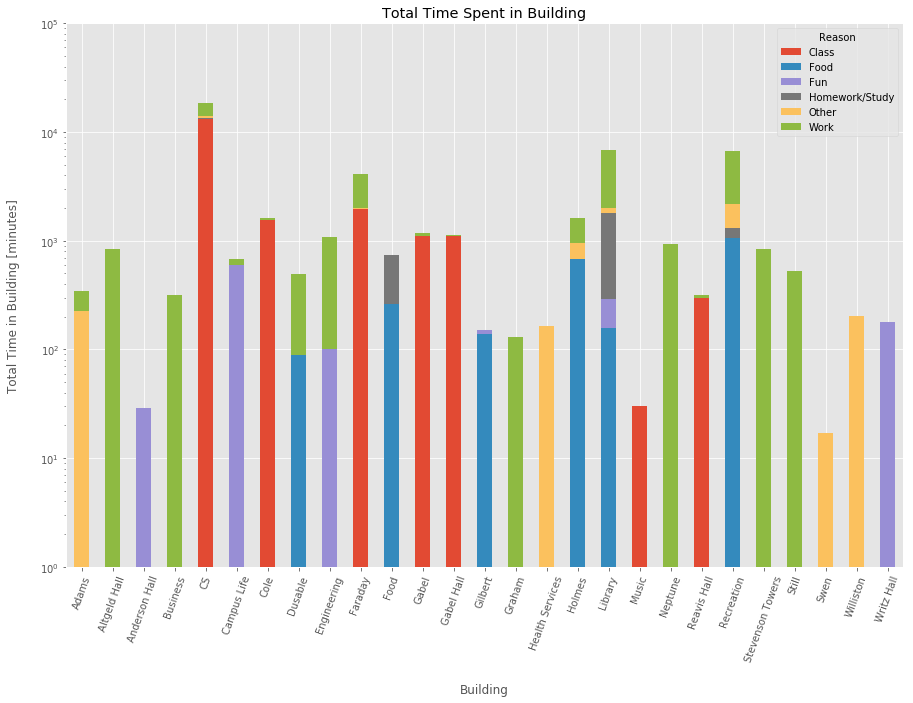

In [3]:
fig = plt.figure()
frame_sorted = final_df.groupby(["building","reason"]).sum()
# ax = frame_sorted.plot.bar(title="Total Time Spent in Building",figsize=(15,10),legend=False,rot=70,logy=True)
ax = frame_sorted.unstack()["time_diff"].plot.bar(title="Total Time Spent in Building",figsize=(15,10),rot=70,stacked=True,logy=True)
ax.set_xlabel("Building",labelpad=20)
ax.set_ylabel("Total Time in Building [minutes]",labelpad=20)
ax.set_ylim(1,100000)
plt.legend(title="Reason")
plt.show()

In [4]:
fig = ax.get_figure()
fig.savefig('Project00_Phase01_Plot.png')